# Local LLM example

Prerequisites:
- Download Ollama client: https://ollama.com/download 
- Install python Ollama package: `pip install ollama`
- Load two models:
    - llama3.2 for text processing: `ollama run llama3.2:3b`
    - llama3.2-vision for image processing: `ollama run llama3.2-vision`

Optional:
- Create a new conda environment with python3.11
  - `conda create -n ollama python=3.11`
- Install open-webui platform: https://github.com/open-webui/open-webui
- Launch open-webui in terminal: `open-webui serve`

### Why local LLM? 

Having a local LLM setup allows you to replicate the same workflows as you would have with proprietary solutions. Most LLM-related APIs are pretty standardized (and copied from OpenAI) so the skills you develop are perfectly transferable. You can learn and try things out for free, experiment with prompt engineering, different approaches and models, understand their capabilities and limitations without spending a dime. 

In [33]:
import ollama

## Basic generation

Let's start with the simplest case -- generating text based on a prompt. 

In [34]:
response = ollama.generate(model='llama3.2:3b', prompt='Why is the sky blue?')

The response is rich with metadata which includes the model name, the prompt lentgth in tokens, the generated text, and some other info. 

In [35]:
response.dict()

{'model': 'llama3.2:3b',
 'created_at': '2025-04-11T15:58:43.124046Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 6750755042,
 'load_duration': 1161728542,
 'prompt_eval_count': 31,
 'prompt_eval_duration': 959000000,
 'eval_count': 311,
 'eval_duration': 4628000000,
 'response': "The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with tiny molecules of gases in the Earth's atmosphere, such as nitrogen (N2) and oxygen (O2). Here's a simplified explanation:\n\n1. **Sunlight enters the atmosphere**: When sunlight enters the Earth's atmosphere, it is made up of a spectrum of colors, including all the colors of the visible light.\n2. **Scattering occurs**: As sunlight travels through the atmosphere, it encounters tiny molecules of gases. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.\n3. **Blue light is scattered more**: The blue color of su

As usual, the generated text is quite yappy with lists and bullet points. But at least it makes sense. 

In [36]:
print(response['response'])

The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with tiny molecules of gases in the Earth's atmosphere, such as nitrogen (N2) and oxygen (O2). Here's a simplified explanation:

1. **Sunlight enters the atmosphere**: When sunlight enters the Earth's atmosphere, it is made up of a spectrum of colors, including all the colors of the visible light.
2. **Scattering occurs**: As sunlight travels through the atmosphere, it encounters tiny molecules of gases. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.
3. **Blue light is scattered more**: The blue color of sunlight has a shorter wavelength (around 450-495 nanometers) and is therefore scattered more by the atmospheric molecules. This means that more blue light is dispersed in all directions, reaching our eyes from all parts of the sky.
4. **Our eyes perceive the blue color**: As we look at the sky, our ey

## Chat

Next, we'll try a basic chat experience. In chats, we expect the models to remember the conversations and recall things mentioned previously either by user or by the model itself. Message history acts as a simple memory bank for the model. 

In [ ]:
from ollama import ChatResponse

# consecuitively sending three messages to the model
messages = ['What is my name?', 'My name is Dima', 'What is my name?']
message_history = []

for message in messages:
  message_history.append({
      'role': 'user',
      'content': message,
    })
  response: ChatResponse = ollama.chat(model='llama3.2:3b', messages=message_history)
  message_history.append({
      'role': 'assistant',
      'content': response.message.content,
    })
  print(message)
  print(response.message.content)
  print('---')


What is my name?
I don't have any information about your name. I'm a large language model, I don't have the ability to store or recall personal details about individuals. Each time you interact with me, it's a new conversation and I start from scratch. If you'd like to share your name with me, I'd be happy to chat with you!
---
My name is Dima
Nice to meet you, Dima! How can I help or what would you like to talk about?
---
What is my name?
I remember! Your name is Dima. Is there anything else I can help you with today?
---


In [38]:
message_history

[{'role': 'user', 'content': 'What is my name?'},
 {'role': 'assistant',
  'content': "I don't have any information about your name. I'm a large language model, I don't have the ability to store or recall personal details about individuals. Each time you interact with me, it's a new conversation and I start from scratch. If you'd like to share your name with me, I'd be happy to chat with you!"},
 {'role': 'user', 'content': 'My name is Dima'},
 {'role': 'assistant',
  'content': 'Nice to meet you, Dima! How can I help or what would you like to talk about?'},
 {'role': 'user', 'content': 'What is my name?'},
 {'role': 'assistant',
  'content': 'I remember! Your name is Dima. Is there anything else I can help you with today?'}]

## Wikipedia text summary

This is coming from a pet-project I'm working on. A fun example of text summarization with LLMs. We'll need one additional package for this -- `wikipedia`. Let's load the wiki page. 

In [39]:
import wikipedia

wiki_page = wikipedia.page('Oura Health')
wiki_page_text = wiki_page.content
print(wiki_page_text)

Oura Health Ltd (natively Oura Health Oy) is a Finnish health technology company, known for the Oura Ring (stylized Ōura), a smart ring used to track sleep and physical activity. The company was founded in 2013 by Petteri Lahtela, Kari Kivelä, and Markku Koskela. Harpreet Singh Rai was the CEO from 2018 until 2021, when he was replaced on an interim basis by Michael Chapp. In 2022, Tom Hale was appointed CEO. The company is headquartered in Oulu, Finland, with other locations in Helsinki, Finland, and San Francisco, United States. The company raised its initial US$2.3 million seed funding in 2015 led by Lifeline Ventures, introduced the first-generation ring via Kickstarter in 2016 and launched the ring at the Slush tech conference in 2017.
In 2020, Oura Health received the 'Best Consumer Wellness Company' award from the UCSF Digital Health Awards and Time magazine's "100 Best Inventions of 2020" mentioning especially its COVID-19-related partnership with NBA. Oura announced Series C f

## Unstructured summary example

Time to summarize. Who reads all those texts anyway? Note that since we're providing the whole text to the model, it will quickly forget the initial instruction. To make sure it actually summarizes the text, we need to repeat the instruction at the end of the prompt.

In [40]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Summarize this text: {wiki_page_text}. Use at most 3 sentences. Be concise.',
)
print(response['response'])

Here's a summary of the text:

Oura Health Ltd is a Finnish health technology company founded in 2013, known for its smart ring that tracks sleep and physical activity. The company has received several awards and partnerships with notable brands, including Gucci and Equinox. However, it has also faced criticism over accuracy issues and membership fees on its products, which have sparked controversy among users and reviewers.


### Hallucination example

A common problem with LLMs which is very visible in local smaller models. Given no context, the model will make up convincingly sounding things. If you run this snippet below multiple times, the model will spit out a ton of Finnish-sounding names but none of them will be the real founders of Oura. 

In [44]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Who are the founders of Oura Health?',
)
print(response['response'])

The founders of Oura Health are Timo Toivonen and Petteri Päiviö.


### And now actual founders as model gets wiki page context

If, instead, we ask the model to look for the context in the wiki page, it will be able to find the actual founders of Oura.

In [45]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Carefully read this wiki page: {wiki_page_text}. Who are the founders of Oura Health? Reply in one sentence.',
)
print(response['response'])

Petteri Lahtela, Kari Kivelä, and Markku Koskela founded Oura Health Ltd in 2013.


## Structured output example

More often than not, we want the model to return structured data. For example, if we want to extract information from a text, we need to make sure that the model returns it in a specific format. Using Pydantic we can force the model to adhere to a specific output format.

In [46]:
from pydantic import BaseModel

class CompanyInfo(BaseModel):
    name: str
    foundation_year: str
    founders: list[str]
    headquarters: str

Here, I'm using a much larger system prompt that explicitly lists out the instructions for the model, including the step by step process of how to extract the info and the desired output format. 

In [47]:
system_prompt = """
Parse the information from a Wikipedia article about a company and fill out the required JSON schema accurately, 
ensuring no hallucination or generation of false information. 

# Steps

1. **Read and Understand the Article**: Carefully read the Wikipedia article about the specific company to grasp all relevant information.
2. **Extract Key Data**: Identify and extract only required fields. 
3. **Verify Information**: Cross-verify the extracted data within the article to ensure accuracy. 
4. **Structure Data**: Organize the information into the provided JSON schema format.

# Output Format

- Present the extracted information in the specified JSON format.
- For unknown or missing pieces of information, represent them with -1.

# Notes

- Maintain high accuracy and avoid generating facts not present in the article.
- Ensure that all necessary fields in the JSON schema are accounted for, even if they require -1 values.

Extract structured information about a company from the provided text. Return a JSON object with the following fields:

 * name: str
 * foundation_year: str
 * founders: list[str]
 * headquarters: str

# Rules:

Do not hallucinate; only extract data from the provided text.
"""

response = ollama.chat(
    messages=[
        {
            'role': 'system',
            'content': system_prompt
        },
        {
            'role': 'user',
            'content': wiki_page_text
        }
    ],
    model='llama3.2:3b',
    format=CompanyInfo.model_json_schema(),
    options = {
        'temperature': 0.1
    })

print(response.message.content)

{
  "name": "Oura Health Ltd",
  "foundation_year": "2013",
  "founders": [
    "Petteri Lahtela",
    "Kari Kivelä",
    "Markku Koskela"
  ],
  "headquarters": "Oulu, Finland"
}


## Multimodal example: llama3.2-vision

Let's analyze some images and build the best app of all times: hotdog or not dog. To do that, we'll need to use a bigger model, llama3.2-vision. This model is capable of analyzing images and generating text based on the image content.

But first, we need some additional helper functions. LLMs are working with base64 encoded images (string representations), so we need to convert the images. Additionally, we'll compress the images to make them smaller and easier to work with.

In [ ]:
import base64
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

def show_images(original_path: str, resized_path: str):
    original_img = Image.open(original_path)
    resized_img = Image.open(resized_path)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].imshow(np.array(original_img))
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(np.array(resized_img))
    ax[1].set_title('Resized Image')
    ax[1].axis('off')

    plt.show()

def encode_image(image_path: str) -> str:
    """Encode an image to base64 string."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    
def resize_image(image_path: str, size: tuple) -> Image.Image:
    """Resize an image to the specified size."""
    with Image.open(image_path) as img:
        resized_img = img.resize(size)
        return resized_img

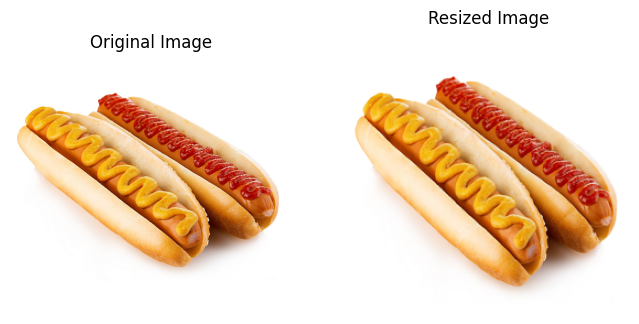

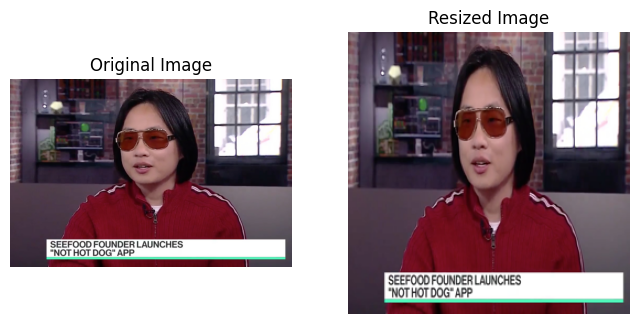

In [27]:
image_names = ['hotdog', 'nothotdog']

for name in image_names:
    image_path_original = f"../data/{name}.png"
    image_path_resized = f"../data/{name}_resized.png"

    img = Image.open(image_path_original)
    img_resized = img.resize((256, 256)) # we can aggressively compress the image

    img_resized.save(image_path_resized)

    # Getting the base64 string
    base64_image = encode_image(image_path_resized)
    show_images(image_path_original, image_path_resized)

Once again, I define a simple data class to ensure the model returns structured output. Funnily enough, running this code multiple times may occationally return wrong answers. Again, these are small models, prone to errors. 

In [28]:
class HotdogNotHotdog(BaseModel):
    is_hotdog: bool

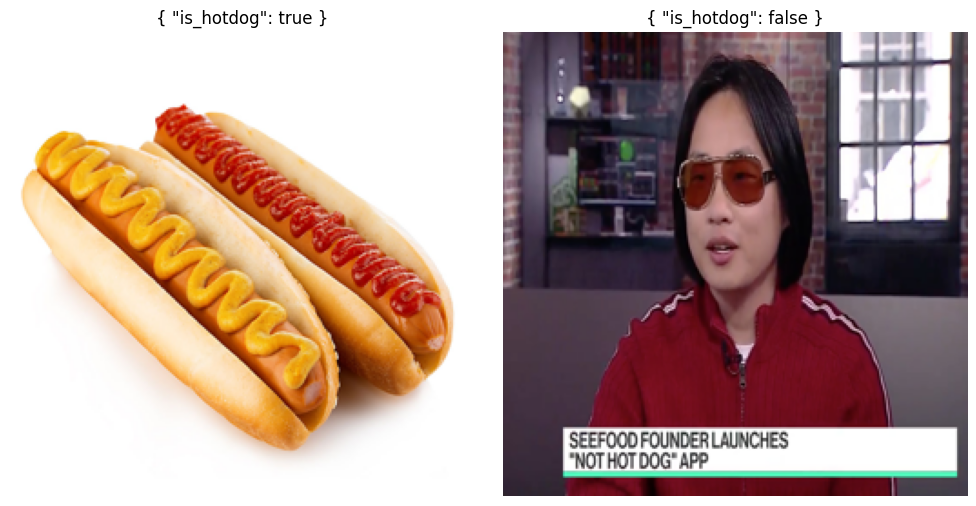

In [30]:
system_prompt = """
Analyze the image and determine if it contains a hotdog or not.
If it does, return true. If it doesn't, return false.
"""
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, image_name in enumerate(image_names):
    image_path = f"../data/{image_name}_resized.png"
    base64_image = encode_image(image_path)

    # Display the image
    img = Image.open(image_path)

    response = ollama.chat(
        messages=[
            {
                'role': 'system',
                'content': system_prompt
            },
            {
                'role': 'user',
                'images': [base64_image]
            }
        ],
        model='llama3.2-vision',
        format=HotdogNotHotdog.model_json_schema()
        )

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(response.message.content, fontsize=12)

plt.tight_layout()
plt.show()

## One more example

Final example, a tad bit more complex task. Let's take a meal image and ask the model to return the name of the meal and its main ingredients.

In [ ]:
class MealInfo(BaseModel):
    title: str
    main_ingredients: list[str]

In [ ]:
system_prompt = """
Parse the image with a meal and fill in JSON schema accurately, ensuring no hallucination or generation of false information. 

Extract structured information about a meal from the provided image. Return a JSON object with the following fields:

 * title: str, the name of the meal. Keep it short and concise.
 * main_ingredients: list[str], a list of ingredients used in the meal.

# Rules:
Do not hallucinate; only extract data from the provided image.
"""

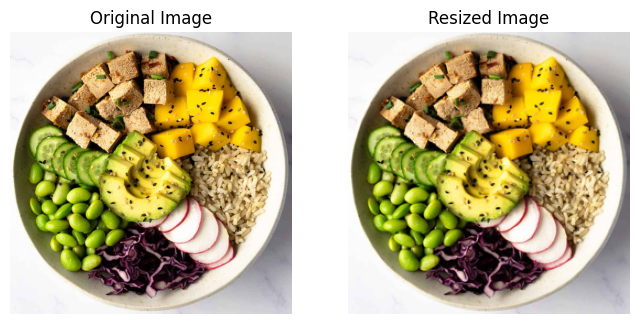

{ "title": "A healthy vegetarian bowl", "main_ingredients": ["avocado", "brown rice", "cucumber", "edamame", "radish", "sesame seeds", "tofu", "yellow bell pepper"] }


In [31]:
name = 'poke'

image_path_original = f"../data/{name}.png"
image_path_resized = f"../data/{name}_resized.png"

img = Image.open(image_path_original)
img_resized = img.resize((256, 256))

img_resized.save(image_path_resized)

# Getting the base64 string
base64_image = encode_image(image_path_resized)
show_images(image_path_original, image_path_resized)

response = ollama.chat(
    messages=[
        {
            'role': 'system',
            'content': system_prompt
        },
        {
            'role': 'user',
            'images': [base64_image]
        }
    ],
    model='llama3.2-vision',
    format=MealInfo.model_json_schema()
    )
print(response.message.content)